# Wage Profile 
Code to accompany Lecture on  
Regression  
Jiaming Mao (<jmao@xmu.edu.cn>)  
<https://jiamingmao.github.io>

In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrix
%matplotlib inline

data = pd.read_csv("Wage.csv")
data.head()
age = data.age
wage = data.wage

## Piecewise Constant Regression

## Cubic Spline and Natural Cubic Spline

In [16]:
age_cs = dmatrix("bs(age, knots=(25,40,60), degree=3, include_intercept=False)",{"age": age},return_type='dataframe')
fit1 = sm.GLM(wage, age_cs).fit()
fit1.params

Intercept                                                            60.493714
bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]     3.980500
bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]    44.630980
bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]    62.838788
bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]    55.990830
bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]    50.688098
bs(age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]    16.606142
dtype: float64

In [17]:
age_ncs = dmatrix("cr(age, knots=(25,40,60))", {"age": age}, return_type='dataframe')
fit2 = sm.GLM(wage, age_ncs).fit()
fit2.params

Intercept                         78.153929
cr(age, knots=(25, 40, 60))[0]   -23.394386
cr(age, knots=(25, 40, 60))[1]     9.985675
cr(age, knots=(25, 40, 60))[2]    39.053020
cr(age, knots=(25, 40, 60))[3]    37.689735
cr(age, knots=(25, 40, 60))[4]    14.819884
dtype: float64

Text(0.5, 1.0, 'Cubic and Natural Cubic Spline')

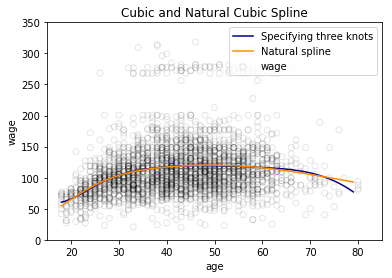

In [25]:
age_grid = np.arange(age.min(),age.max()).reshape(-1,1)
pred1 = fit1.predict(dmatrix("bs(age_grid, knots=(25,40,60), include_intercept=False)", {"age_grid": age_grid}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("cr(age_grid, knots=(25,40,60))", {"age_grid": age_grid}, return_type='dataframe'))

plt.scatter(age, wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(age_grid, pred1, color='darkblue', label='Specifying three knots')
plt.plot(age_grid, pred2, color='darkorange', label='Natural spline')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.title('Cubic and Natural Cubic Spline')

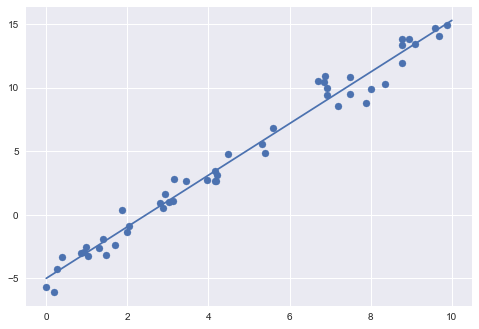

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:,np.newaxis], y)

xfit = np.linspace(0,10,1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [33]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.02720881036
Model intercept: -4.99857708555


## Multiple Linear Regression

In [39]:
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5
[ 1.5 -2.   1. ]


## Basis Function Regression
### Polynomial basis functions

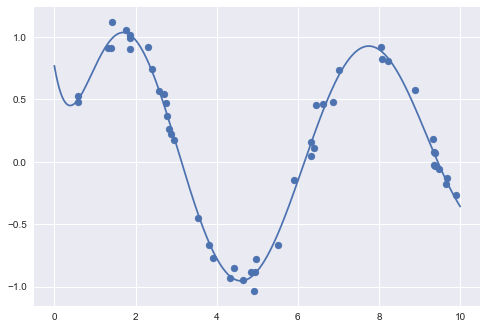

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(7),LinearRegression())

x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);